In [13]:
import os
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt


In [14]:
ANNOTATIONS_DIR = "/Users/sakprave/Downloads/VOCdevkit/VOC2012/Annotations"
IMAGES_DIR = "/Users/sakprave/Downloads/VOCdevkit/VOC2012/JPEGImages"

In [17]:
def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    boxes = []
    labels = []
    filename = root.find('filename').text

    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')

        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)

    return filename, boxes, labels


In [12]:
def show_image_with_boxes(image_path, boxes, labels):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        text = label
        (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, 1)
        
        cv2.rectangle(image, (x1, y1 - text_height - 4), (x1 + text_width, y1), (255, 255, 255), -1)
        cv2.putText(image, text, (x1, y1 - 2), font, font_scale, (0, 0, 0), 1)

    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("VOC Annotations")
    plt.show()


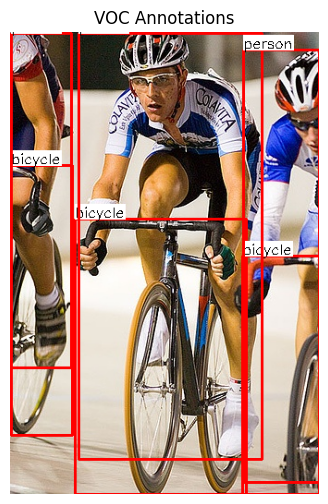

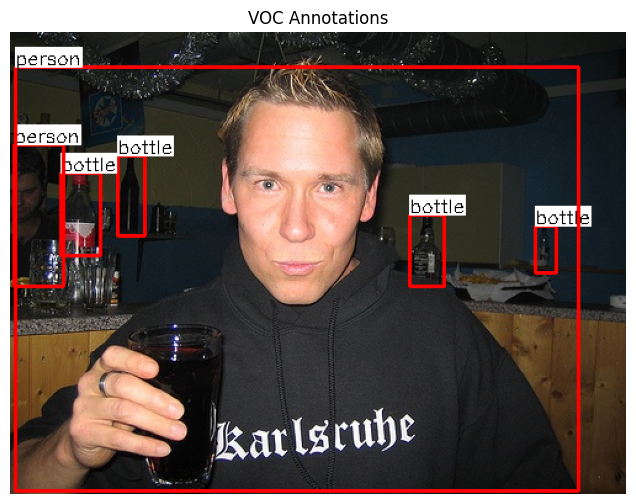

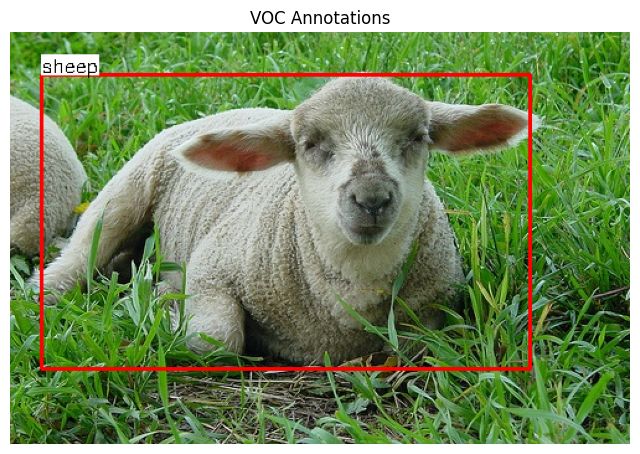

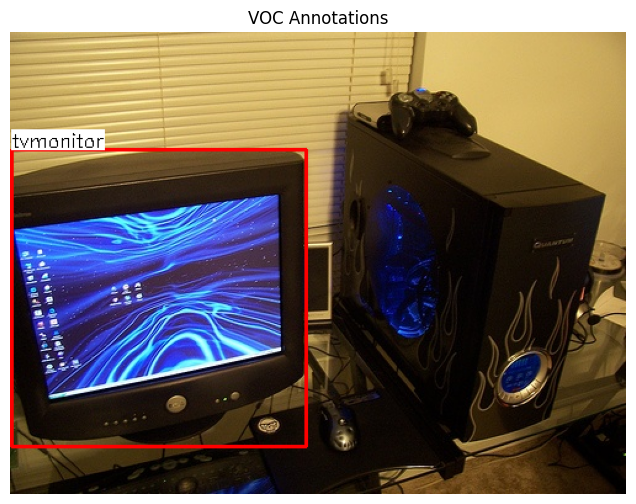

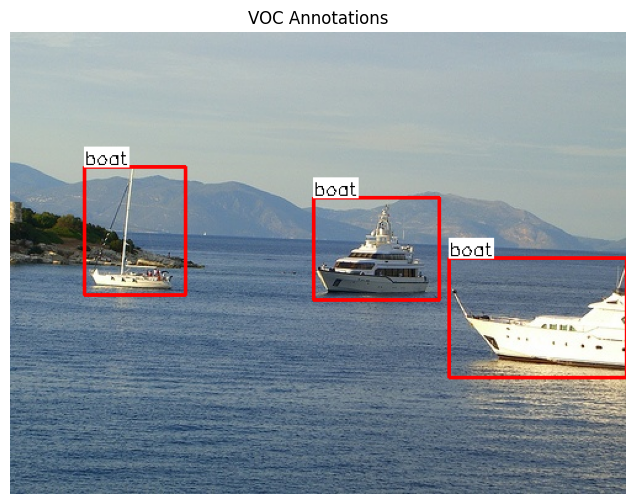

In [18]:
xml_files = sorted(os.listdir(ANNOTATIONS_DIR))


for xml_file in xml_files[10:15]:
    xml_path = os.path.join(ANNOTATIONS_DIR, xml_file)
    filename, boxes, labels = parse_voc_annotation(xml_path)
    image_path = os.path.join(IMAGES_DIR, filename)
    
    show_image_with_boxes(image_path, boxes, labels)
